# Characterestics of users who massively using the bike service

## Investigation Overview

In this investigation, I'm most interested in figuring out what features are best for identifying the characterestics of users who massively using the bike service and their utilization time period and there prefered stations.

## Dataset Overview
Ford GoBike is a bike sharing system in the San Francisco Area .The dataset containing information about Trip duration,station names,user types,user birth year and other attributes for approximately 183412 bike ride in february 2019..

In [17]:
# Read data set into dataframe
gobike_df=pd.read_csv('fordgobike2019.csv')
gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,28/02/2019 17:32,01/03/2019 08:01,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,28/02/2019 18:53,01/03/2019 06:42,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,28/02/2019 12:13,01/03/2019 05:24,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,28/02/2019 17:54,01/03/2019 04:02,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,28/02/2019 23:54,01/03/2019 00:20,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [18]:
# data wrangling -change data types
# change data types of  start_time and end_time  to date and time formate
gobike_df.start_time = pd.to_datetime(gobike_df.start_time,errors='ignore')
gobike_df.end_time = pd.to_datetime(gobike_df.end_time,errors='ignore')

# data wrangling -- > adding columns
# for analysis purposes hourse will be calculated from start_time in an new int column
gobike_df['start_hour']=gobike_df['start_time'].dt.hour

# Adding age column using data in member_birh_year
#gobike_df['member_birth_year']=gobike_df.member_birth_year.astype(int)
gobike_df['age']=2019 - gobike_df['member_birth_year']

# for analysis purposes duration will be calculated in minutes in an new int column
gobike_df['rid_time_in_minuites']=gobike_df['duration_sec']/60
gobike_df['rid_time_in_minuites']=gobike_df.rid_time_in_minuites.astype(int)


In [19]:
# data wrangling   -- > data clearing
# drop raws that donot have birth year,gender,start_station,end_station data availiable 
gobike_df=gobike_df.dropna()

# drop member_birth_year will not required any more
gobike_df.drop(columns=['member_birth_year'],inplace=True)

#drop Columns whch will not be required in current data analysis
gobike_df.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],inplace=True)

# dropping raws with  age >65 and trip duration >55 minutes
gobike_df=gobike_df[gobike_df.age<65]
gobike_df=gobike_df[gobike_df.rid_time_in_minuites<55]


## Ford BIke share service  Age Distribution 

Most of Ford Bike share service consumer is between 30 and 40 years old and the minimum age is almost 20 the maximum age after data cleaning is 64

Text(0.5, 1.0, 'Age ststistics of the bikeshare service consumers')

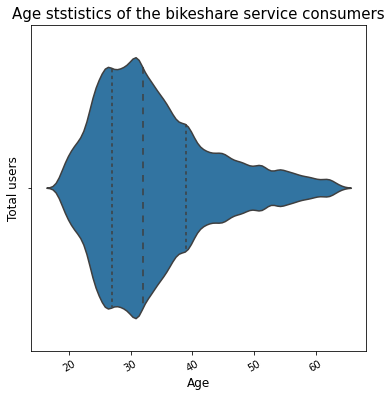

In [20]:
#exploring  the age ststistics of the bikeshare service consumers 
plt.subplots(figsize=(6,6))
base_color = sns.color_palette()[0]
sns.violinplot(data=gobike_df, x='age', color=base_color, inner='quartile')
plt.xticks(rotation=30);
plt.xlabel ('Age',fontsize = 12);
plt.ylabel ('Total users',fontsize = 12);
plt.title('Age ststistics of the bikeshare service consumers',fontsize = 15)


## Ford Bike share service  most  used start statation
Market St at 10th St is most commonoly used as start station for greater than 3600 service users 

Text(0.5, 0, 'Total users')

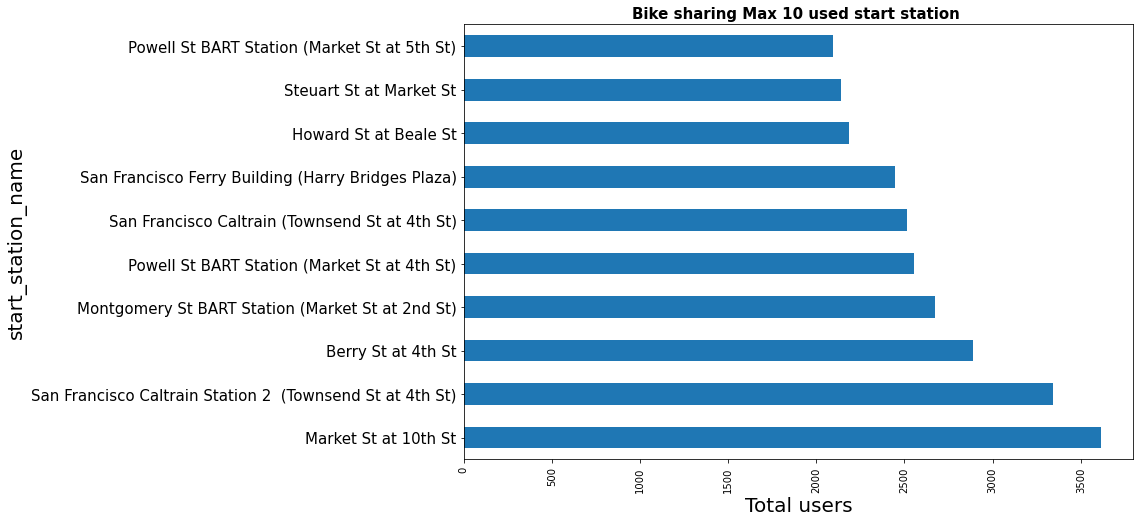

In [21]:
# exploring the most used start statation
plt.subplots(figsize=(12,8))
st_use_count=gobike_df['start_station_name'].value_counts(sort=True)
st_maxused=st_use_count.head(10)
plt.xticks(rotation=90);
plt.yticks(fontsize = 15);
ax = st_maxused.plot.barh(x =st_maxused.values , y = st_maxused.index, color=base_color)
ax.set_title('Bike sharing Max 10 used start station ',fontsize = 15, fontweight='bold')
ax.set_ylabel('start_station_name', fontsize = 20)
ax.set_xlabel('Total users', fontsize = 20)


## Trip duration in minutes

Most of the users have a common Trip durattion  between 2 and 12 minutes for a ride 

Text(0.5, 1.0, 'Trip duration histogram')

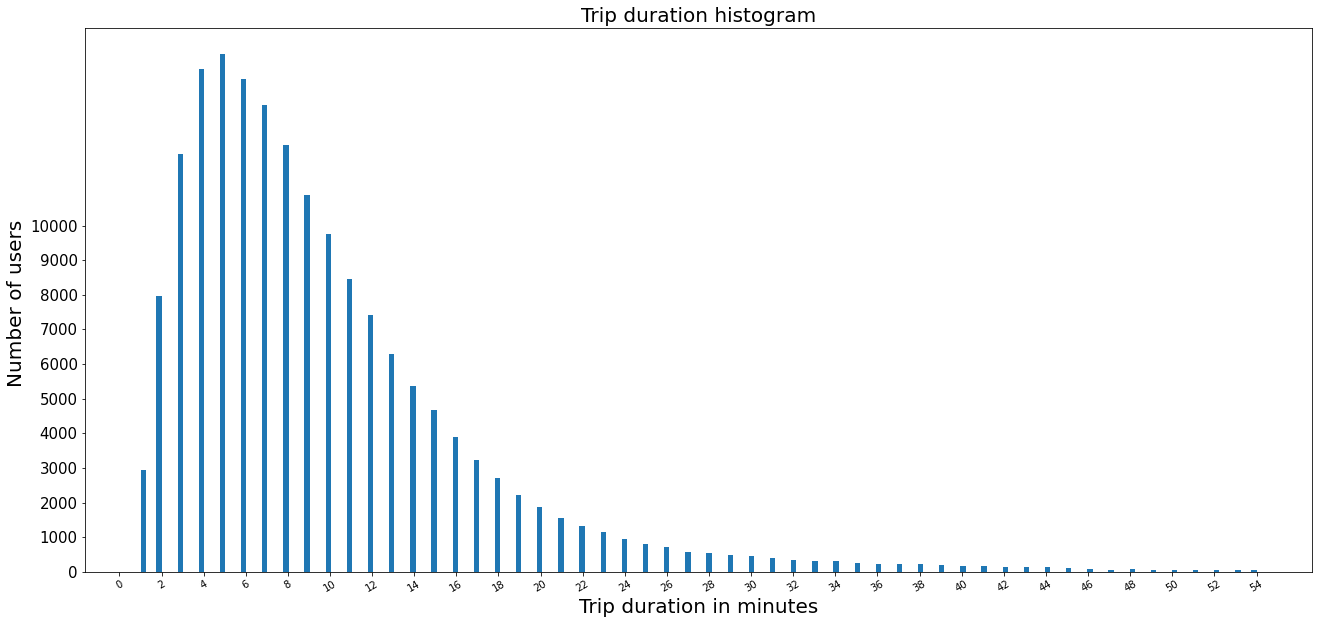

In [22]:
# Exploring trip duration in minutes 
counts, bins = np.histogram(gobike_df['rid_time_in_minuites'])
plt.subplots(figsize=(22,10))
plt.hist(gobike_df['rid_time_in_minuites'] ,bins='auto');
plt.xticks(np.arange(0, 56, step=2),rotation=30);
plt.xlabel("Trip duration in minutes",fontsize = 20);
plt.ylabel("Number of users ",fontsize = 20);
plt.yticks(np.arange(0, 11000, step=1000),fontsize = 15);
plt.title("Trip duration histogram",fontsize = 20)


## Rushhour of bikesharing service in  day
The rush hours of using Bike sharing service in the day is from 7 to 9 in the morning  and from 16-18  after noon

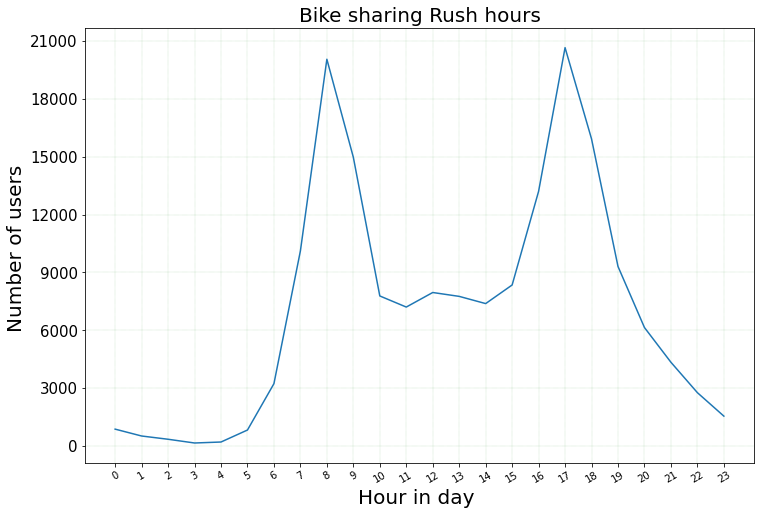

In [23]:
# exploring the rushhour of bikesharing service in a day
plt.subplots(figsize=(12,8))
rush=gobike_df['start_hour'].value_counts(sort=False)
x=rush.index
y=rush.values
plt.plot(x,y)
plt.xticks(np.arange(0, 24, step=1),rotation=30);
plt.xlabel("Hour in day ",fontsize = 20);
plt.ylabel("Number of users ",fontsize = 20);
plt.yticks(np.arange(0, 24000, step=3000),fontsize = 15);
plt.title("Bike sharing Rush hours",fontsize = 20)
plt.grid(color='g', linestyle='dotted', linewidth=.2)



##  stations with highest and lowest avaerage users age 
5th St at Tylor St station have the highest average users age of 50 years however Haste ST at College Ave station have the lowest average user age of 24.5 years  

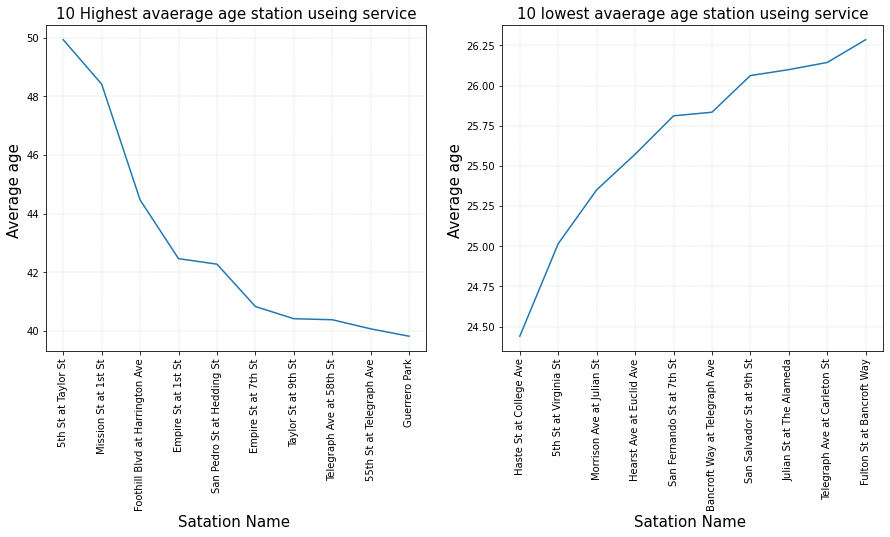

In [24]:
# exploring the stations that used by 10 highest avaerage age comapred to stations that used by the 10 lowest avaerage age of users
fig = plt.figure( figsize=(15,6))
hi_age_station=gobike_df.groupby(["start_station_name"])["age"].mean().nlargest(10)
ax=fig.add_subplot(121)
x=hi_age_station.index
y=hi_age_station.values
plt.plot(x,y)
plt.xticks(rotation=90);
plt.grid(color='g', linestyle='dotted', linewidth=.2)
plt.xlabel("Satation Name ",fontsize = 15);
plt.ylabel("Average age ",fontsize = 15);
plt.title("10 Highest avaerage age station useing service",fontsize = 15)
low_age_station=gobike_df.groupby(["start_station_name"])["age"].mean().nsmallest(10)
ax=fig.add_subplot(122)
x=low_age_station.index
y=low_age_station.values
plt.plot(x,y)
plt.xlabel("Satation Name ",fontsize = 15);
plt.ylabel("Average age ",fontsize = 15);
plt.xticks(rotation=90);
plt.title("10 lowest avaerage age station useing service",fontsize = 15)
plt.grid(color='g', linestyle='dotted', linewidth=.2)


## Users gender vs age and trip duration in minutes
1- Young females 18 years old have trip duration between 18 and 36 minutes
2- Males in all ages have trip duration between 8 and 13 minutes 
3- users who didnot provide there gender or choose other gender there trip duration was between 5 and 15 most of the time decreasing to 2 minutes and increasing to reach 32 minutes in defined ages 

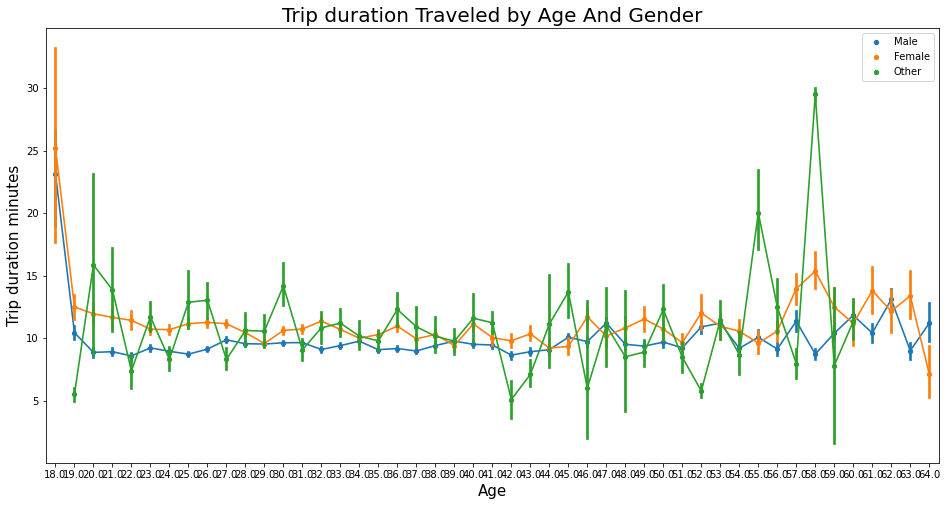

In [25]:
#Exploring relation between members gender vs age and trip duration in minutes

plt.figure(figsize=(16,8))
ax = sns.pointplot(x='age', y='rid_time_in_minuites', hue='member_gender', scale=.6, data=gobike_df)
plt.title('Trip duration Traveled by Age And Gender', fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Trip duration minutes',  fontsize=15)
leg = ax.legend()
ax = plt.gca();


## Gender and usertype services utilization in each hour of the day
1- Male subscriber using the service more frequently than Female and other genders in all day hours
2- Female subscriber use the services more frequently than other gender in all day hours
3- the same roles existed in customers
4- For all genders the rush hours for both subscriber and customers is from 8 to 9 am and 16 to 18 after noon 

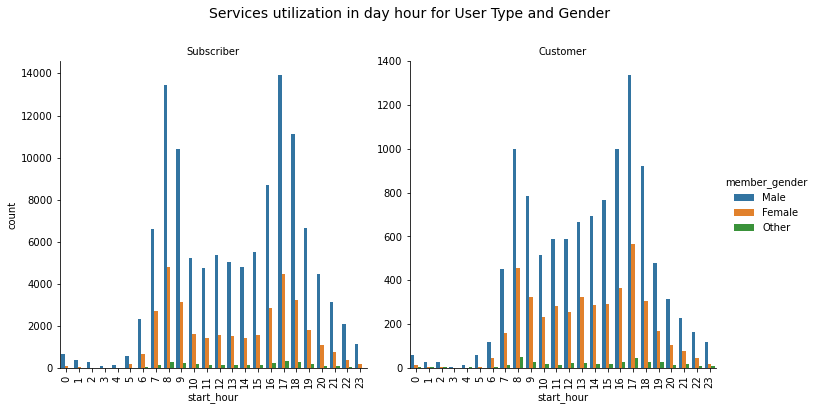

In [26]:
# exploring gender and usertype services utilization in each hour of the day
ax1 = sns.catplot(data=gobike_df, x='start_hour', col="user_type", hue="member_gender", kind='count', sharey = False )
ax1.set_titles("{col_name}")
ax1.fig.suptitle('Services utilization in day hour for User Type and Gender', y=1.08, fontsize=14)
ax1.set_xticklabels(rotation=90);


# Thank You 

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford gobike slides.ipynb'])

1